Plots distributions of cruise time in all NYC taxi zones. 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
trip_df_15m = pd.read_csv('../data/trip_df_15m.csv')
cruise_time_15m = pd.read_csv('../data/cruise_time_15m.csv')

In [33]:
cruise_time_15m = pd.read_csv('../data/cruise_time_15m.csv')

In [11]:
trip_df_15m.head()

,index,hack_license,pickup_taxizone_id,dropoff_taxizone_id,pickup_datetime,dropoff_datetime,pickup_datetime_next,pickup_taxizone_id_next,cruise_time,dropoff_datetime_interval,dropoff_datetime_index
0,3,2013000001,234.0,141.0,2013-06-24 20:17:00,2013-06-24 20:28:00,2013-06-24 20:30:00,141.0,2.0,20:30:00,82
1,4,2013000001,141.0,263.0,2013-06-24 20:30:00,2013-06-24 20:35:00,2013-06-24 20:37:00,263.0,2.0,20:30:00,82
2,5,2013000001,263.0,239.0,2013-06-24 20:37:00,2013-06-24 20:49:00,2013-06-24 20:52:00,239.0,3.0,20:45:00,83
3,8,2013000001,162.0,233.0,2013-06-26 17:24:00,2013-06-26 17:35:00,2013-06-26 17:36:00,233.0,1.0,17:30:00,70
4,12,2013000001,233.0,114.0,2013-06-26 18:28:00,2013-06-26 18:50:00,2013-06-26 18:53:00,114.0,3.0,18:45:00,75


## zone 0-99

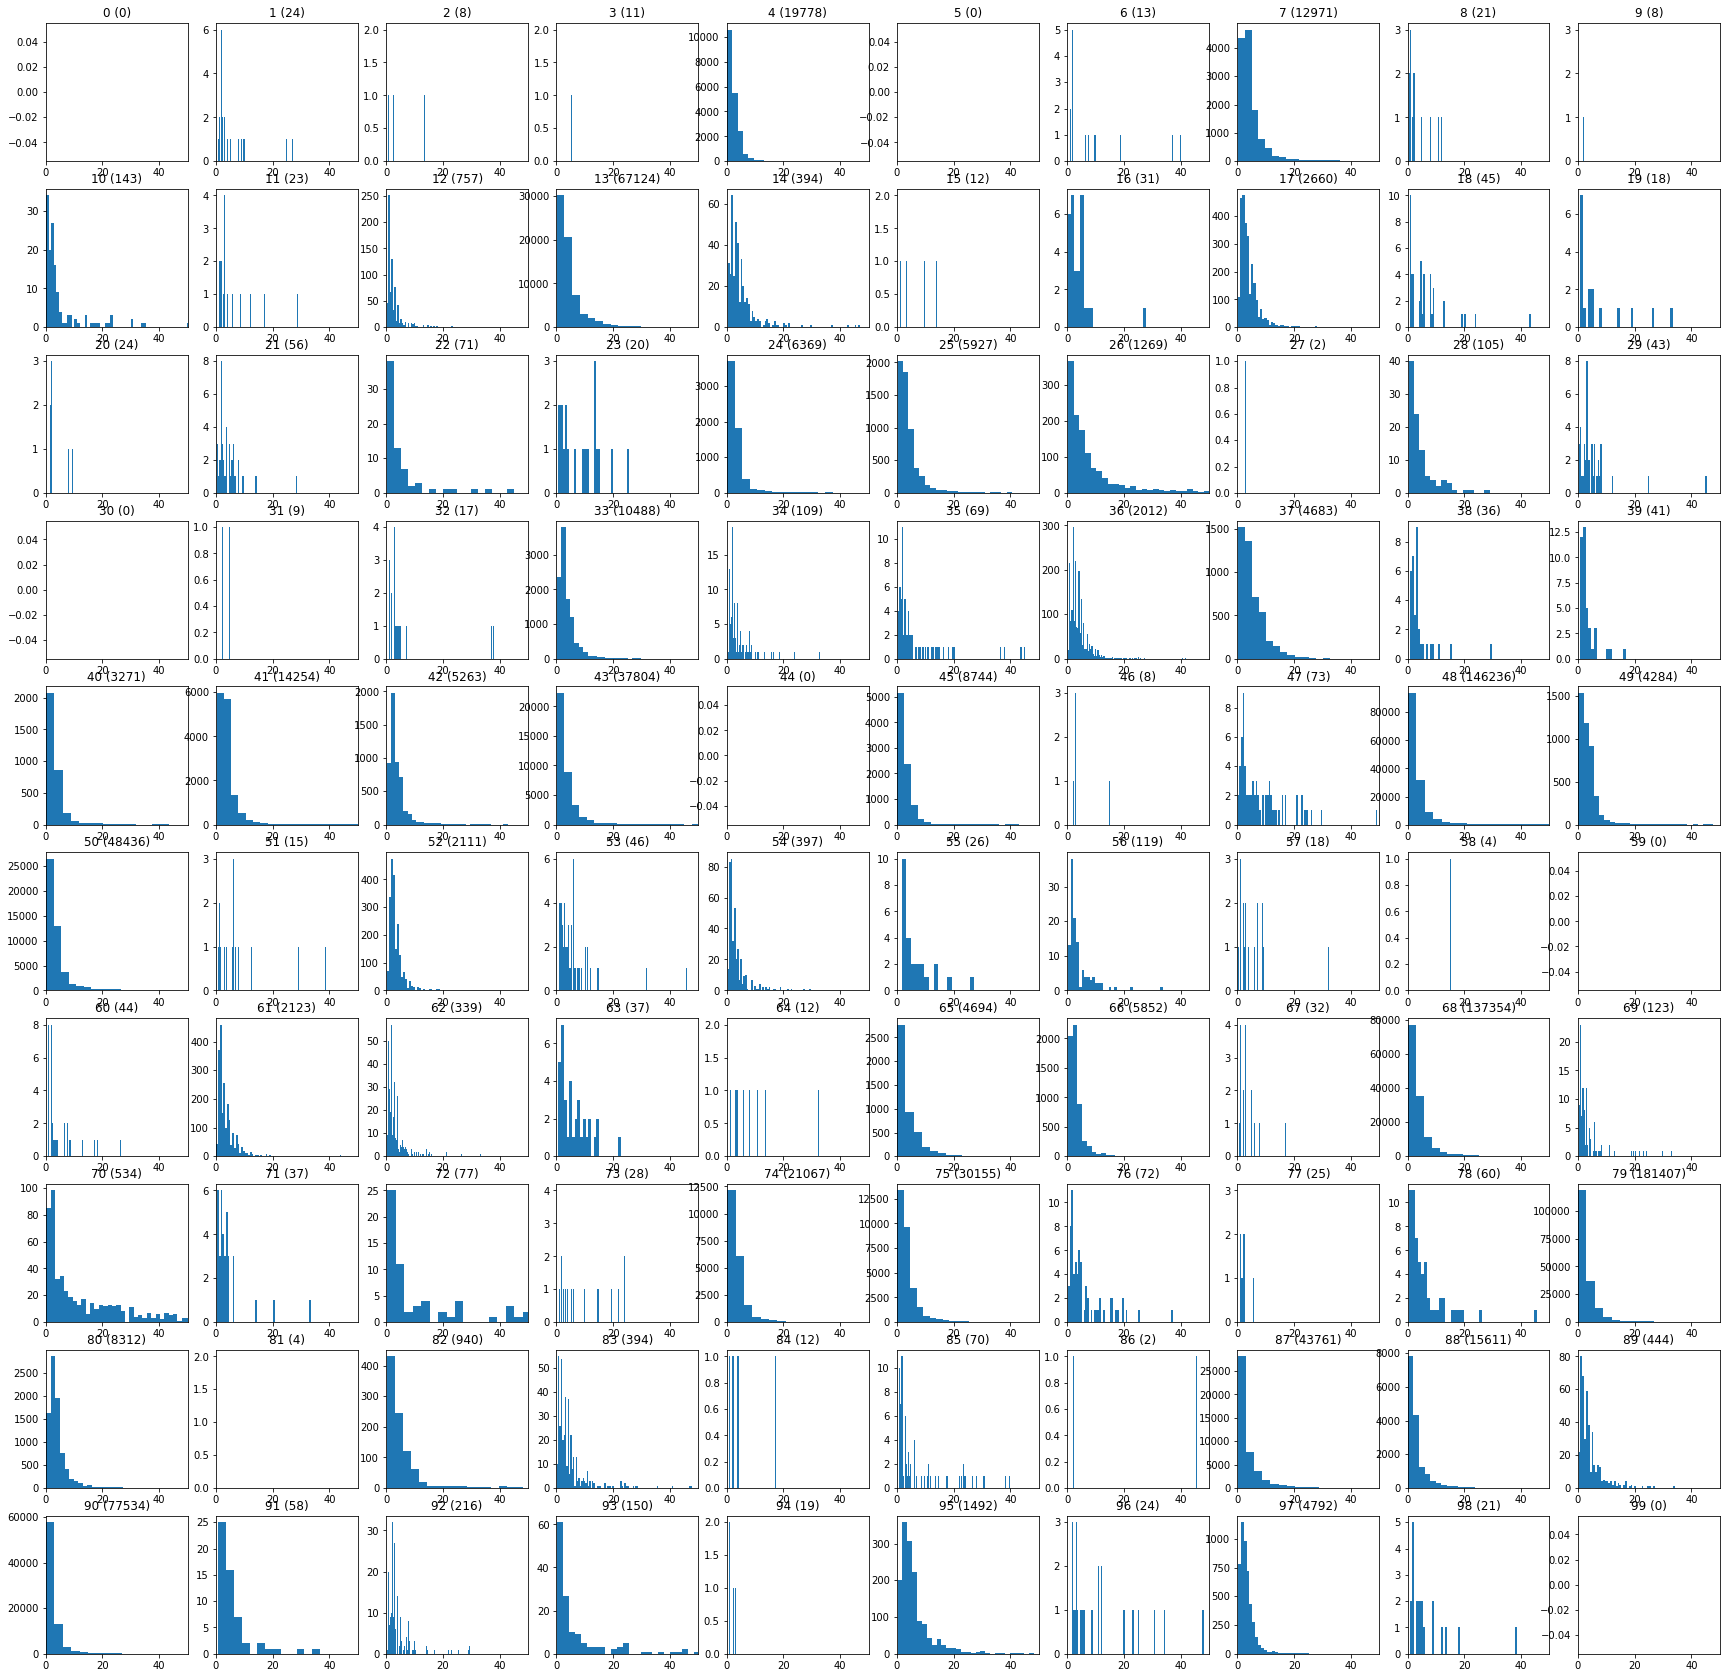

In [36]:
fig, ax = plt.subplots(10,10, figsize = (30, 30))

for i in range(10):
    for j in range(10):
        zone = i*10 + j
        current_trip_df = trip_df_15m.loc[trip_df_15m['dropoff_taxizone_id'] == zone]

        ax[i,j].hist(current_trip_df['cruise_time'], bins=100)
        ax[i,j].set_xlim(0, 50)
        ax[i,j].set_title('{} ({})'.format(zone, current_trip_df.shape[0]))

## zone 100-199

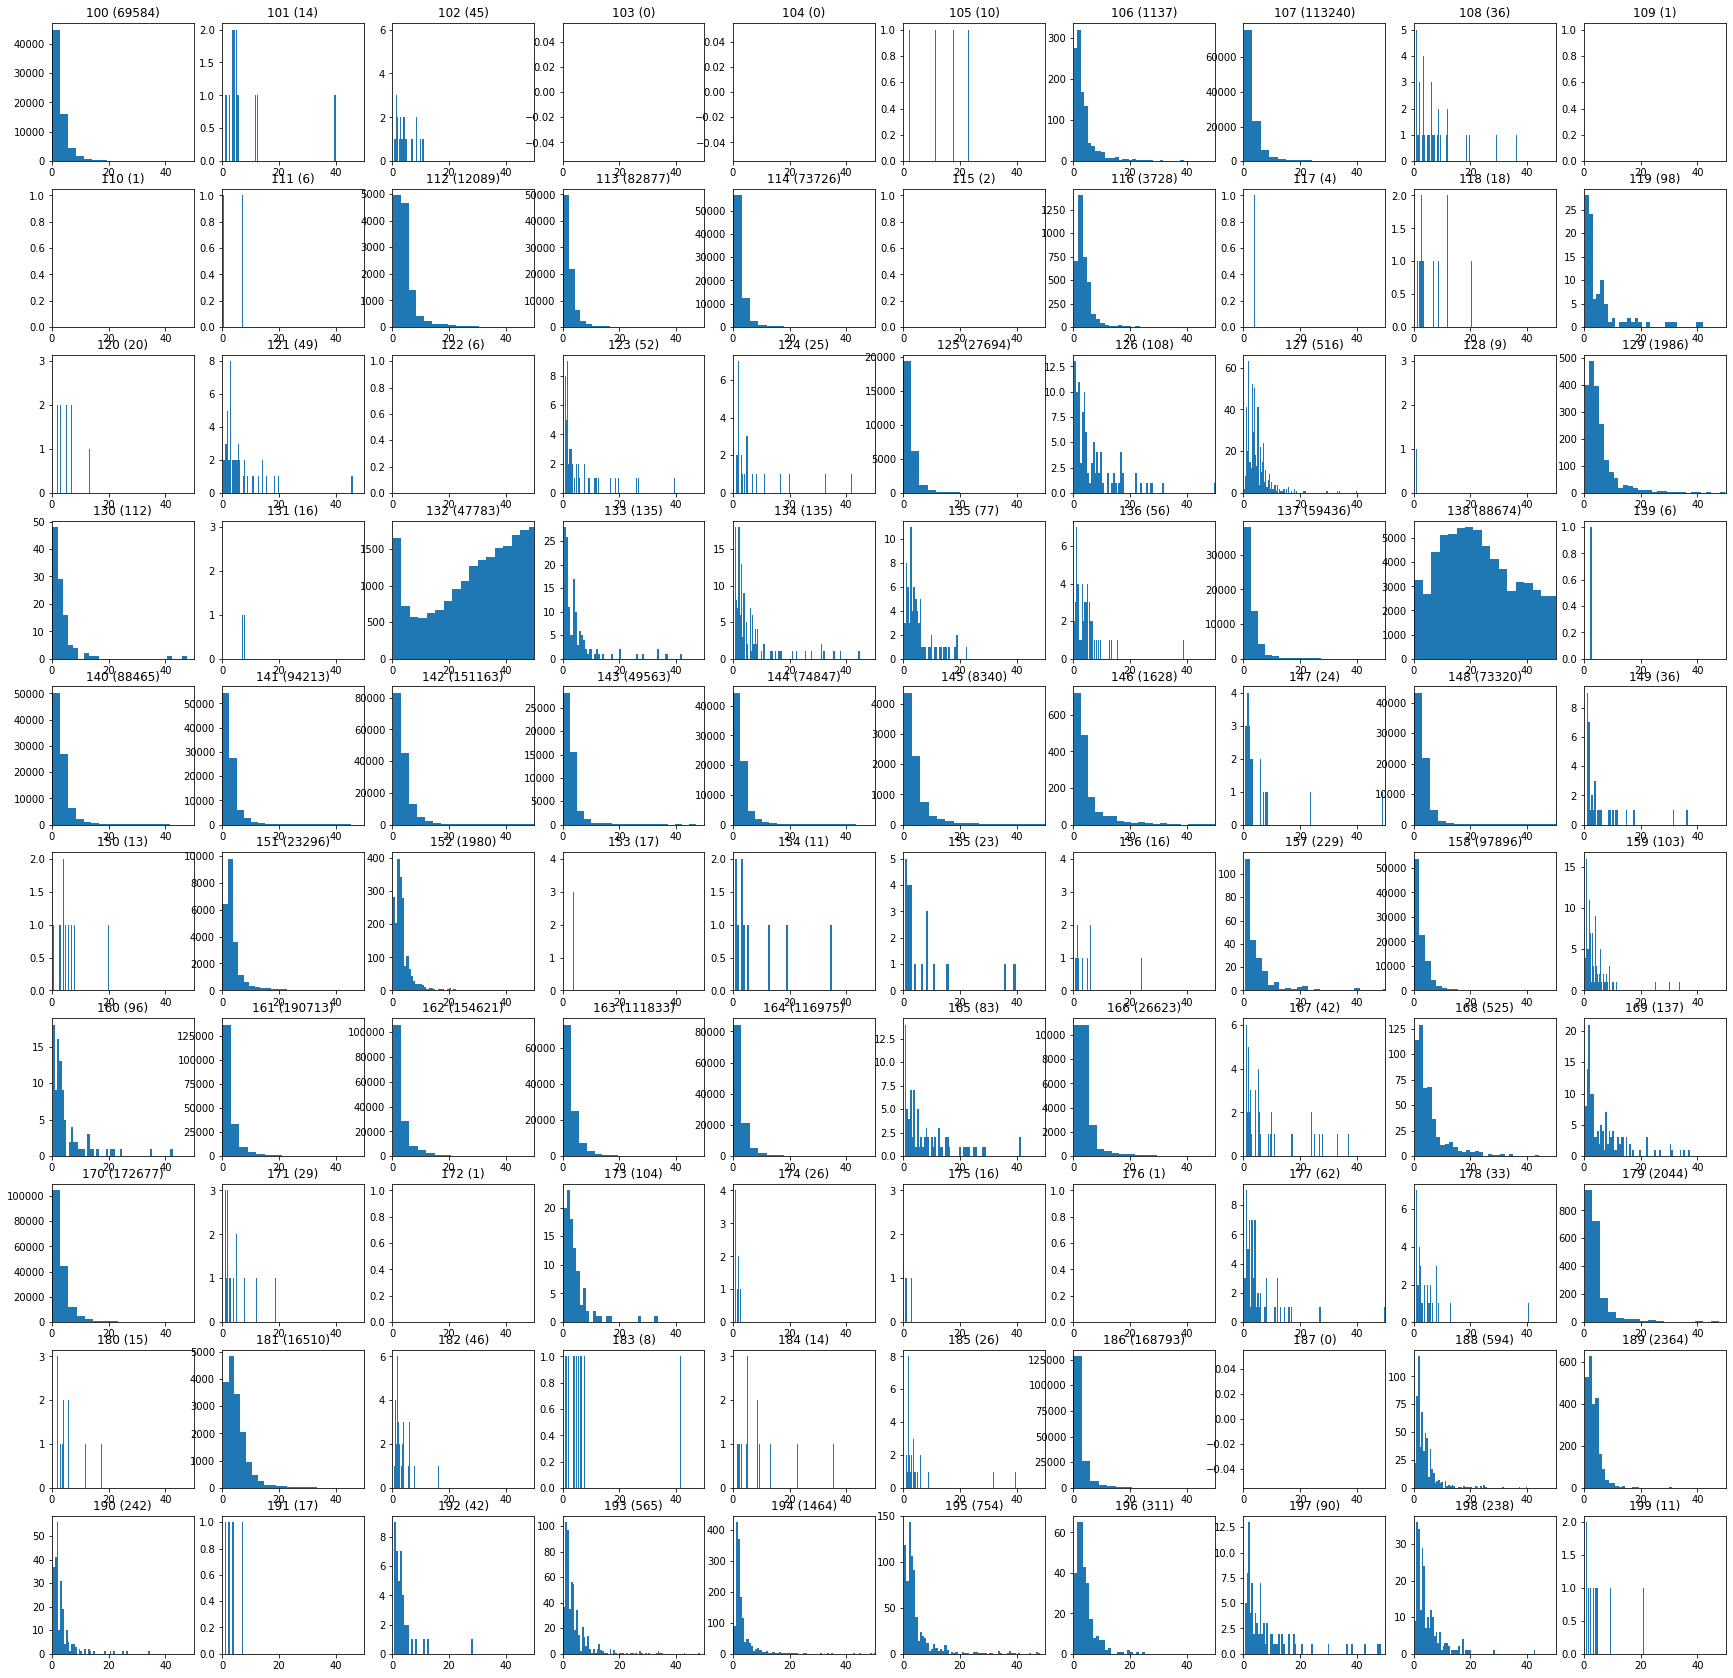

In [37]:
fig, ax = plt.subplots(10,10, figsize = (30, 30))

for i in range(10):
    for j in range(10):
        zone = i*10 + j + 100
        current_trip_df = trip_df_15m.loc[trip_df_15m['dropoff_taxizone_id'] == zone]

        ax[i,j].hist(current_trip_df['cruise_time'], bins=100)
        ax[i,j].set_xlim(0, 50)
        ax[i,j].set_title('{} ({})'.format(zone, current_trip_df.shape[0]))

## zone 200-263

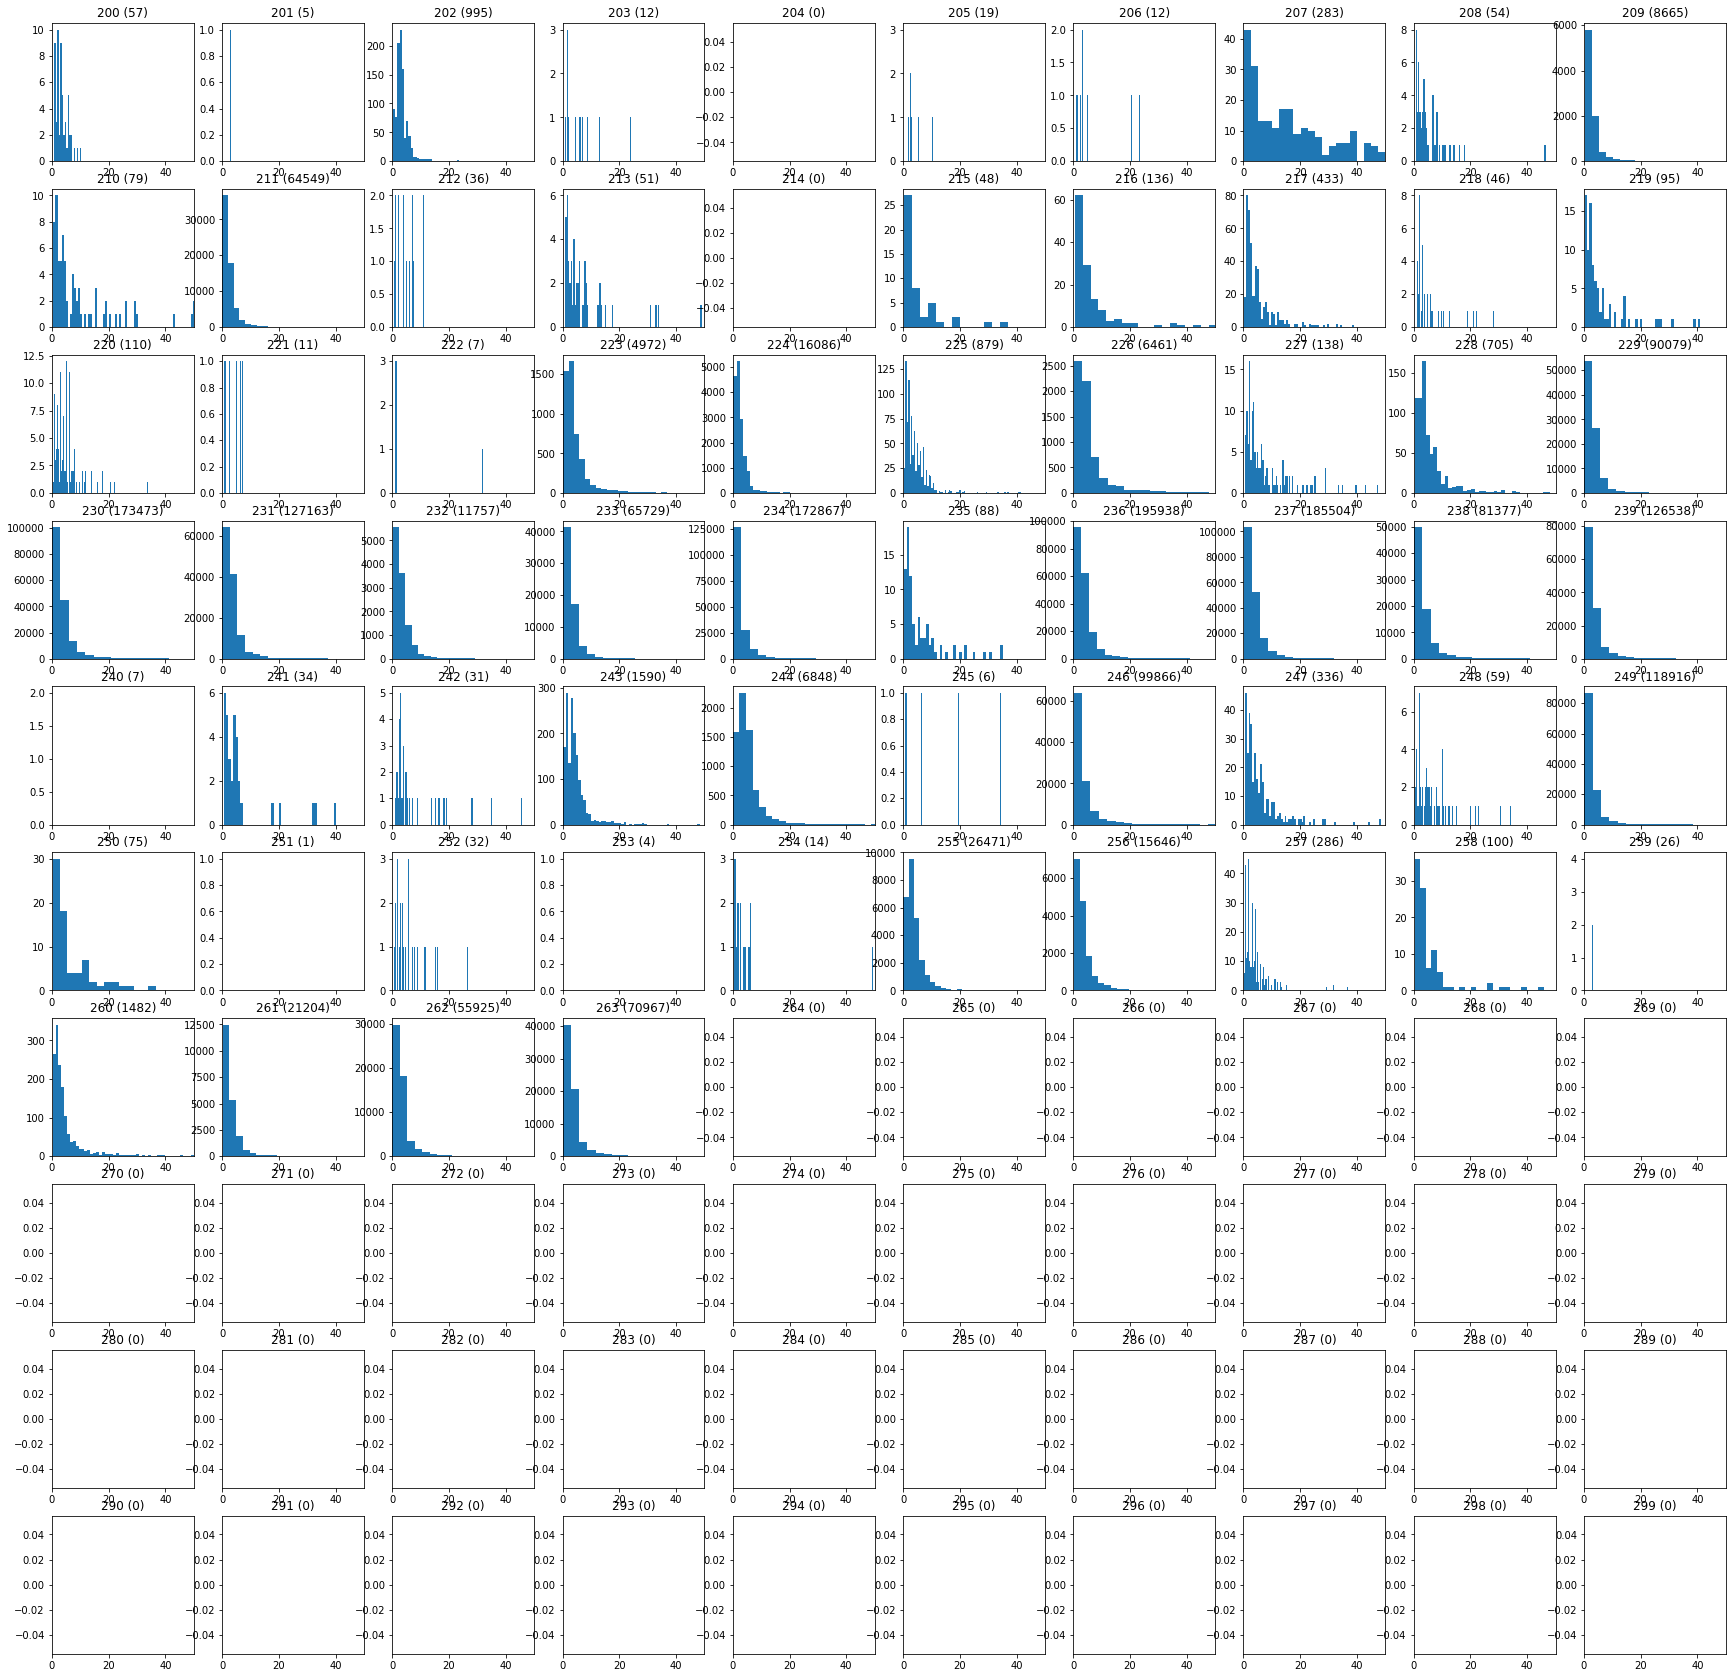

In [38]:
fig, ax = plt.subplots(10,10, figsize = (30, 30))

for i in range(10):
    for j in range(10):
        zone = i*10 + j + 200
        current_trip_df = trip_df_15m.loc[trip_df_15m['dropoff_taxizone_id'] == zone]

        ax[i,j].hist(current_trip_df['cruise_time'], bins=100)
        ax[i,j].set_xlim(0, 50)
        ax[i,j].set_title('{} ({})'.format(zone, current_trip_df.shape[0]))

In [43]:
trip_df_15m.head()

,index,hack_license,pickup_taxizone_id,dropoff_taxizone_id,pickup_datetime,dropoff_datetime,pickup_datetime_next,pickup_taxizone_id_next,cruise_time,dropoff_datetime_interval,dropoff_datetime_index
0,3,2013000001,234.0,141.0,2013-06-24 20:17:00,2013-06-24 20:28:00,2013-06-24 20:30:00,141.0,2.0,20:30:00,82
1,4,2013000001,141.0,263.0,2013-06-24 20:30:00,2013-06-24 20:35:00,2013-06-24 20:37:00,263.0,2.0,20:30:00,82
2,5,2013000001,263.0,239.0,2013-06-24 20:37:00,2013-06-24 20:49:00,2013-06-24 20:52:00,239.0,3.0,20:45:00,83
3,8,2013000001,162.0,233.0,2013-06-26 17:24:00,2013-06-26 17:35:00,2013-06-26 17:36:00,233.0,1.0,17:30:00,70
4,12,2013000001,233.0,114.0,2013-06-26 18:28:00,2013-06-26 18:50:00,2013-06-26 18:53:00,114.0,3.0,18:45:00,75


## % of cruising longer than 15 minutes

In [54]:
trip_df_15m['above_15'] = [1 if t > 15 else 0 for t in trip_df_15m['cruise_time']]
print('{0:.2f}% have cruise time above 15 mins'.format(trip_df_15m['above_15'].sum()/trip_df_15m.shape[0]*100))

4.90% have cruise time above 15 mins


In [67]:
above_15 = trip_df_15m.groupby('dropoff_taxizone_id', as_index=False)['above_15'].agg(['sum', 'count']).reset_index()
above_15['%above15'] = above_15['sum']/above_15['count']*100

Text(0, 0.5, '%')

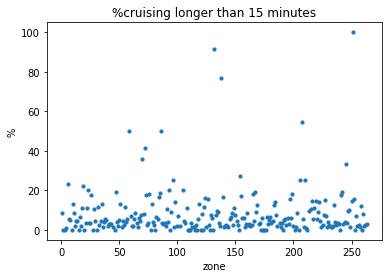

In [77]:
plot, ax = plt.subplots(1,1)

ax.scatter(above_15['dropoff_taxizone_id'], above_15['%above15'], s= 10)
ax.set_title('%cruising longer than 15 minutes')
ax.set_xlabel('zone')
ax.set_ylabel('%')

In [79]:
above_15.loc[above_15['%above15'] > 40]

,dropoff_taxizone_id,sum,count,%above15
54,58.0,2,4,50.000000
67,72.0,32,77,41.558442
81,86.0,1,2,50.000000
124,132.0,43660,47783,91.371408
130,138.0,68058,88674,76.750795
197,207.0,155,283,54.770318
240,251.0,1,1,100.000000


132 = Queens, JFK  
138 = Queens, LGA  
207 = Queens, Saint Michaels Cemetery/Woodside

## JFK and LGA

Text(0.5, 1.0, 'LGA (138)')

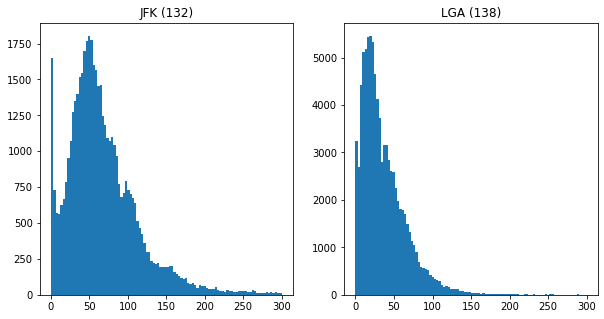

In [82]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

current_trip_df = trip_df_15m.loc[trip_df_15m['dropoff_taxizone_id'] == 132]
ax[0].hist(current_trip_df['cruise_time'], bins=100)
ax[0].set_title('JFK (132)')

current_trip_df = trip_df_15m.loc[trip_df_15m['dropoff_taxizone_id'] == 138]
ax[1].hist(current_trip_df['cruise_time'], bins=100)
ax[1].set_title('LGA (138)')

## Histogram of zone cruise times

Text(0.5, 1.0, 'Avg Cruise Time')

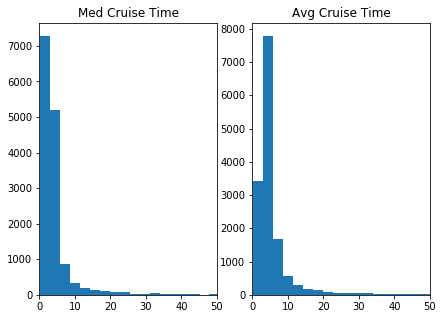

In [42]:
fig, ax = plt.subplots(1,2, figsize=(7,5))
ax[0].hist(cruise_time_15m['med_cruise_time'], bins=100)
ax[0].set_xlim(0, 50)
ax[0].set_title('Med Cruise Time')

ax[1].hist(cruise_time_15m['avg_cruise_time'], bins=100)
ax[1].set_xlim(0, 50)
ax[1].set_title('Avg Cruise Time')